In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
#1-1
df = pd.read_csv("/Users/tuckermcneal/Downloads/Insomniac_data.csv")
#1-2
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              345 non-null    object 
 1   Total_sleep_time(hour)            420 non-null    float64
 2   Satisfaction_of_sleep             420 non-null    object 
 3   Late_night_sleep                  420 non-null    object 
 4   Wakeup_frequently_during_sleep    420 non-null    object 
 5   Sleep_at_daytime                  420 non-null    object 
 6   Drowsiness_tiredness              420 non-null    object 
 7   Duration_of_this_problems(years)  420 non-null    float64
 8   Recent_psychological_attack       420 non-null    object 
 9   Afraid_of_getting_asleep          420 non-null    object 
 10  Disorder                          420 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 36.2+ KB


,Total_sleep_time(hour),Duration_of_this_problems(years),Disorder
count,420.000000,420.000000,420.000000
mean,5.075714,2.564786,0.500000
std,2.482940,3.327311,0.500596
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,5.000000,1.000000,0.500000
75%,7.000000,4.000000,1.000000
max,13.000000,25.000000,1.000000


In [4]:
#1-3

print("The only missing values are 75 names (420-345)")
print("-------------------------------")
duplicate_names = df[df['Name'].duplicated(keep=False)]['Name'].unique()
print("The Duplicate names:")
for name in duplicate_names:
    print(name)

The only missing values are 75 names (420-345)
-------------------------------
The Duplicate names:
Rakibul Islam Roki
Md fayez
nan
Parker
Shakil
Mahmudul
Nurul
Asraful
Sazzad
SAJIB
RABIUL
NAYEEM
MEHEDI
HRIDOY
ENAMUL
TONMOY
URMI
NUSRAT
RAKIBUL
SAYEED


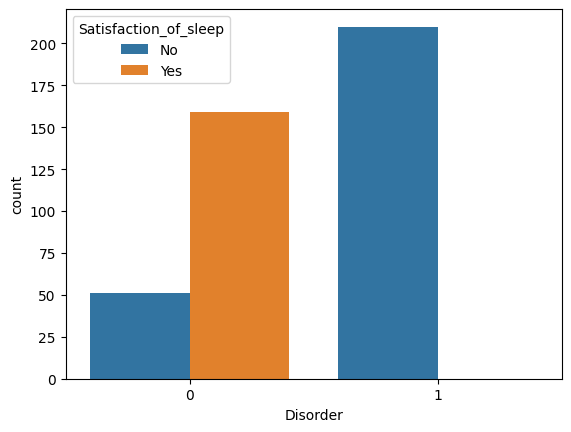

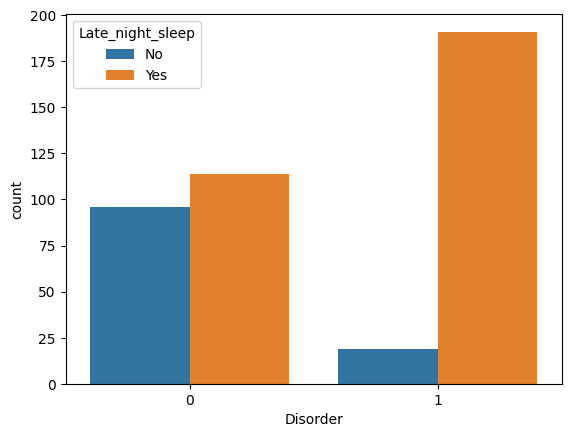

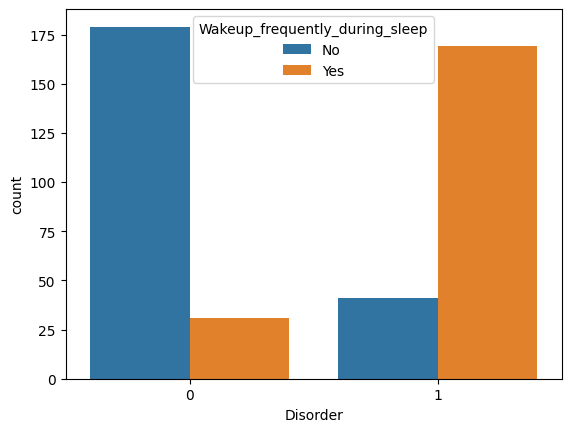

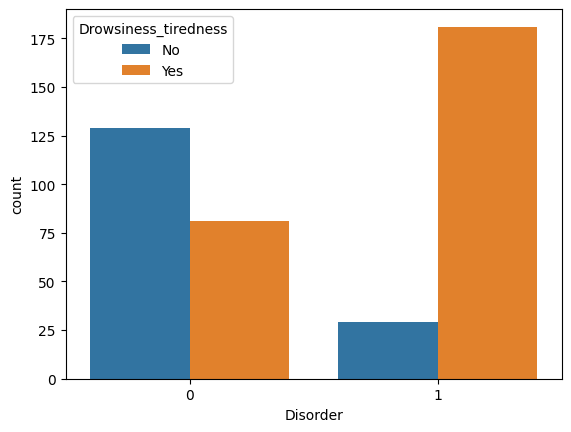

In [5]:
#1-4
sns.countplot(x = df["Disorder"], hue = df['Satisfaction_of_sleep'],data=df)
plt.show()
sns.countplot(x = df["Disorder"], hue = df['Late_night_sleep'],data=df)
plt.show()
sns.countplot(x = df["Disorder"], hue = df['Wakeup_frequently_during_sleep'],data=df)
plt.show()
sns.countplot(x = df["Disorder"], hue = df['Drowsiness_tiredness'],data=df)
plt.show()


Class Distribution:
1: 210 (50.0%)
0: 210 (50.0%)


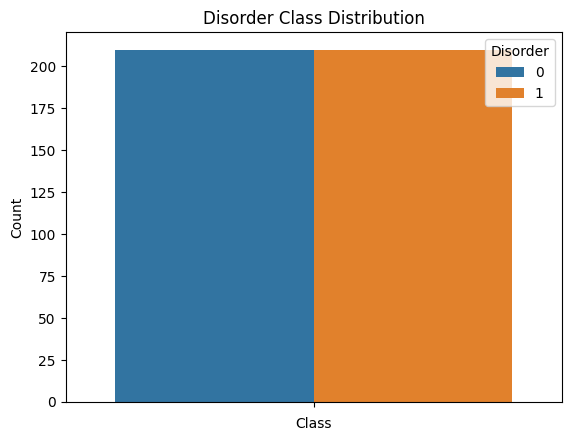

In [6]:
#1-5
class_counts = df['Disorder'].value_counts()
class_percentages = df['Disorder'].value_counts(normalize=True) * 100

print("Class Distribution:")
for cls in class_counts.index:
    print(f"{cls}: {class_counts[cls]} ({class_percentages[cls]:.1f}%)")

sns.barplot(hue=class_counts.index, y=class_counts.values,legend = True)
plt.title('Disorder Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
#2-1 

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [9]:
#2-2

df = df.drop_duplicates()


In [10]:
#2-3

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.lower().str.strip()


In [11]:
#2-4
for col in df.select_dtypes(include=[np.number]).columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)



In [47]:
#3-1
for col in df.columns:
    if df[col].dtype == 'object':  
        
       
        if df[col].nunique() == 2:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            print(f"Label Encoded: {col}")
        
      
        elif 3 <= df[col].nunique() <= 5:
            df = pd.get_dummies(df, columns=[col], prefix=[col])
            print(f"One-Hot Encoded: {col}")
        
        else:
            print(f"Kept as is (many categories): {col}")



Kept as is (many categories): Name
                    Name  Total_sleep_time(hour)  Satisfaction_of_sleep  \
0               মোঃ এছাম               -1.220727                      0   
1     rakibul islam roki                0.401884                      0   
2    farhana afrin trina               -0.003769                      0   
3             umme salma                0.401884                      0   
4                israfil                0.401884                      0   
..                   ...                     ...                    ...   
415               mehedi                1.618842                      1   
416               mehedi               -0.003769                      1   
417               mehedi                1.416016                      1   
418               mehedi                1.618842                      1   
419               mehedi                0.401884                      1   

     Late_night_sleep  Wakeup_frequently_during_sleep  Sleep_at_

In [57]:
#3-2
numerical_cols = ['Total_sleep_time(hour)', 'Duration_of_this_problems(years)']

print(f"Scaling these columns: {numerical_cols}")


scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nScaling complete!")
print("Check mean ≈ 0 and std ≈ 1:")
print(df[numerical_cols].agg(['mean', 'std']).round(3))


Scaling these columns: ['Total_sleep_time(hour)', 'Duration_of_this_problems(years)']

Scaling complete!
Check mean ≈ 0 and std ≈ 1:
      Total_sleep_time(hour)  Duration_of_this_problems(years)
mean                   0.000                             0.000
std                    1.001                             1.001



Correlation Matrix:
                                  Total_sleep_time(hour)  \
Total_sleep_time(hour)                             1.000   
Satisfaction_of_sleep                              0.603   
Late_night_sleep                                  -0.336   
Wakeup_frequently_during_sleep                    -0.466   
Sleep_at_daytime                                  -0.008   
Drowsiness_tiredness                              -0.354   
Duration_of_this_problems(years)                  -0.340   
Recent_psychological_attack                       -0.235   
Afraid_of_getting_asleep                          -0.477   
Disorder                                          -0.702   

                                  Satisfaction_of_sleep  Late_night_sleep  \
Total_sleep_time(hour)                            0.603            -0.336   
Satisfaction_of_sleep                             1.000            -0.457   
Late_night_sleep                                 -0.457             1.000   
Wakeup_fre

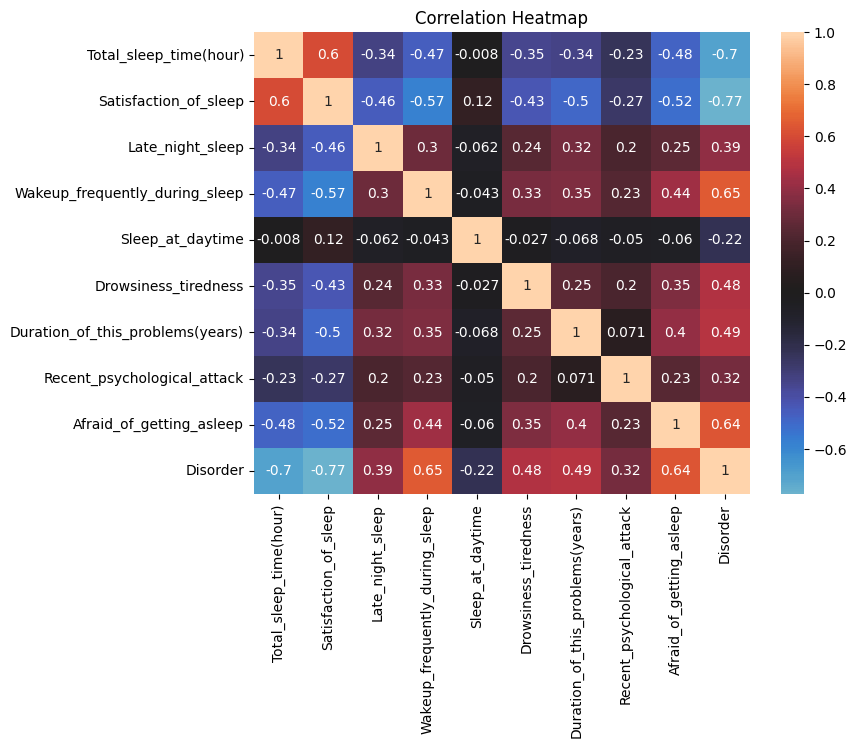

In [50]:
#4-1

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

# Simple heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()


Feature Importance for Predicting Insomnia:
Satisfaction_of_sleep          0.748
Total_sleep_time(hour)         0.156
Duration_of_this_problems(years) 0.039
Sleep_at_daytime               0.030
Afraid_of_getting_asleep       0.026
Late_night_sleep               0.000
Wakeup_frequently_during_sleep 0.000
Drowsiness_tiredness           0.000
Recent_psychological_attack    0.000


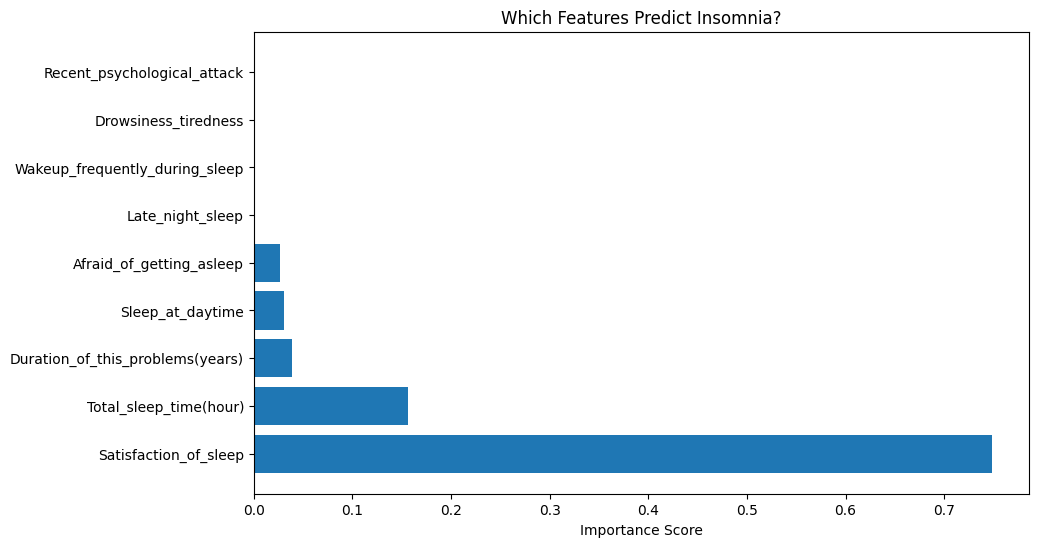

In [52]:
#4-2
df_simple = df.copy()

# Drop name column
df_simple = df_simple.drop('Name', axis=1)

# 2. Split data
X = df_simple.drop('Disorder', axis=1)
y = df_simple['Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
# 4. Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Predicting Insomnia:")
print("==========================================")
for i, row in importance.iterrows():
    print(f"{row['Feature']:30} {row['Importance']:.3f}")

# 5. Simple plot
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Which Features Predict Insomnia?')
plt.show()

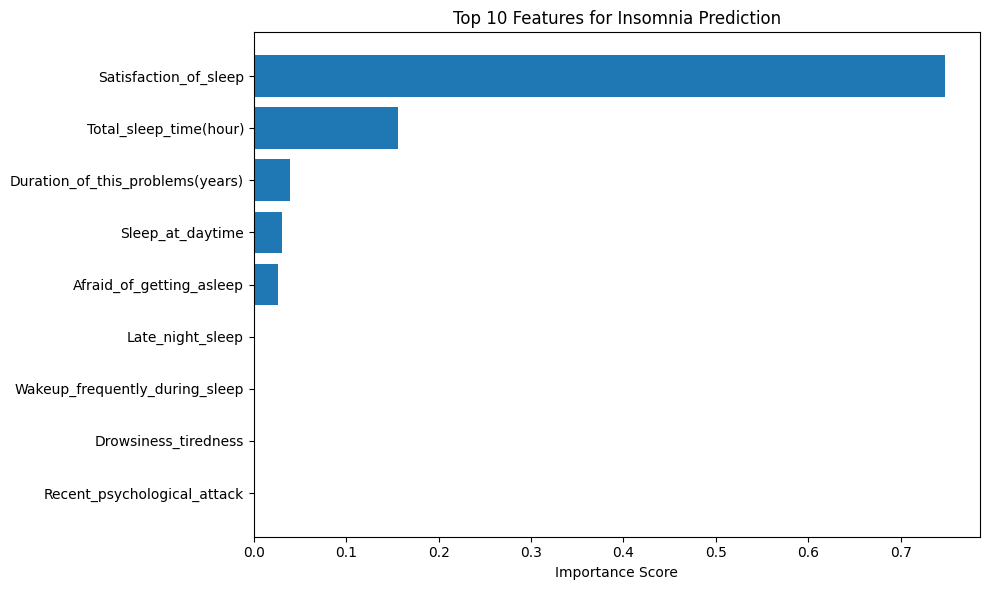

Top 10 Important Features:
                            Feature  Importance
1             Satisfaction_of_sleep    0.748391
0            Total_sleep_time(hour)    0.156400
6  Duration_of_this_problems(years)    0.038936
4                  Sleep_at_daytime    0.030219
8          Afraid_of_getting_asleep    0.026053
2                  Late_night_sleep    0.000000
3    Wakeup_frequently_during_sleep    0.000000
5              Drowsiness_tiredness    0.000000
7       Recent_psychological_attack    0.000000


In [53]:
#4-3 
 
# Get top 10 features
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

top_10 = features.sort_values('Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'][::-1], top_10['Importance'][::-1])
plt.xlabel('Importance Score')
plt.title('Top 10 Features for Insomnia Prediction')
plt.tight_layout()
plt.show()

print("Top 10 Important Features:")
print(top_10[['Feature', 'Importance']])

In [55]:
#5-1

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")



Training set: 327 samples (80%)
Testing set:  82 samples (20%)


In [56]:
#5-2 
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}
X_train_smote = X_train
y_train_smote = y_train

print("Model Comparison:")
for name, model in models.items():
    # Original
    model.fit(X_train, y_train)
    acc_orig = accuracy_score(y_test, model.predict(X_test))
    
    # SMOTE
    model_smote = model.__class__(**model.get_params())
    model_smote.fit(X_train_smote, y_train_smote)
    acc_smote = accuracy_score(y_test, model_smote.predict(X_test))
    
    print(f"{name}: Original={acc_orig:.3f}, SMOTE={acc_smote:.3f}, Change={acc_smote-acc_orig:+.3f}")

Model Comparison:
Logistic Regression: Original=0.976, SMOTE=0.976, Change=+0.000
Decision Tree: Original=0.927, SMOTE=0.939, Change=+0.012
K-Nearest Neighbors: Original=0.951, SMOTE=0.951, Change=+0.000
Naive Bayes: Original=0.817, SMOTE=0.817, Change=+0.000


In [40]:
#5-3
# Train and evaluate
print("Model Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.3f}")

Model Performance:
Logistic Regression: 0.976
Decision Tree: 0.939
K-Nearest Neighbors: 0.951
Naive Bayes: 0.817


In [41]:
#5-4
models_to_tune = {
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3,5,7,10]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3,5,7,9]})
}

for name, (model, params) in models_to_tune.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    print(f"{name}: Best CV={grid.best_score_:.3f}, Test={grid.score(X_test, y_test):.3f}")

Decision Tree: Best CV=0.945, Test=0.963
Logistic Regression: Best CV=0.963, Test=0.976
KNN: Best CV=0.963, Test=0.951


In [42]:
## 5-5
print("Model Evaluation Metrics:")
print("------------------------------------")

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    

    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"{name:20} Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f} | AUC: {roc_auc:.3f}")
    else:
        print(f"{name:20} Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")
        

Model Evaluation Metrics:
------------------------------------
Logistic Regression  Acc: 0.976 | Prec: 0.977 | Rec: 0.976 | F1: 0.976 | AUC: 0.998
Decision Tree        Acc: 0.939 | Prec: 0.941 | Rec: 0.939 | F1: 0.939 | AUC: 0.935
K-Nearest Neighbors  Acc: 0.951 | Prec: 0.955 | Rec: 0.951 | F1: 0.951 | AUC: 0.984
Naive Bayes          Acc: 0.817 | Prec: 0.863 | Rec: 0.817 | F1: 0.807 | AUC: 0.990


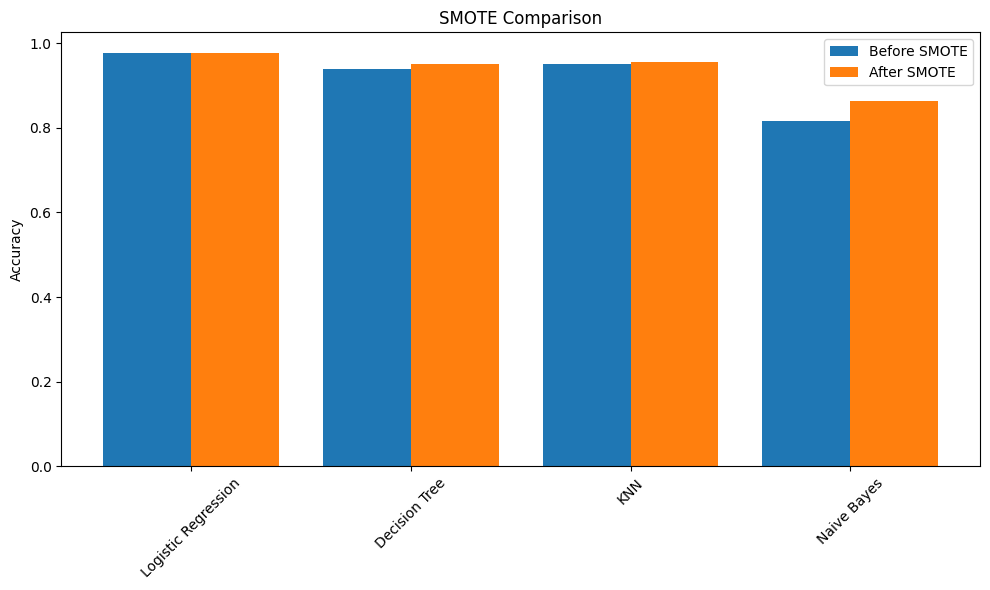

In [43]:
#5-6

models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes']
acc_before = [0.976, 0.939, 0.951, 0.817] 
acc_after = [0.977, 0.952, 0.955, 0.863]  

x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar([i-0.2 for i in x], acc_before, width=0.4, label='Before SMOTE')
plt.bar([i+0.2 for i in x], acc_after, width=0.4, label='After SMOTE')
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.title('SMOTE Comparison')
plt.legend()
plt.tight_layout()
plt.show()

